In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.model_selection import train_test_split

# Desafio evaluacion ML

En la entrega anterior utilizamos las variables que mas correlacion tenian con nuestra variable dependiente, en esta ocasion en vez de descartar las variables originales de nuestro dataset, las evaluaremos a todas pasandolas por un algoritmo de PCA.

In [49]:
CBP = pd.read_csv('https://media.githubusercontent.com/media/Gonzalo-Ariel-Alonso/Proyecto_Data_Science/master/Company%20Bankruptcy%20Prediction.csv')
CBP

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [50]:
# Escalado de datos
scaler = StandardScaler()
CBP_scaled = scaler.fit_transform(CBP)

Cantidad de componentes: 8
Varianza explicada total: % 97.96


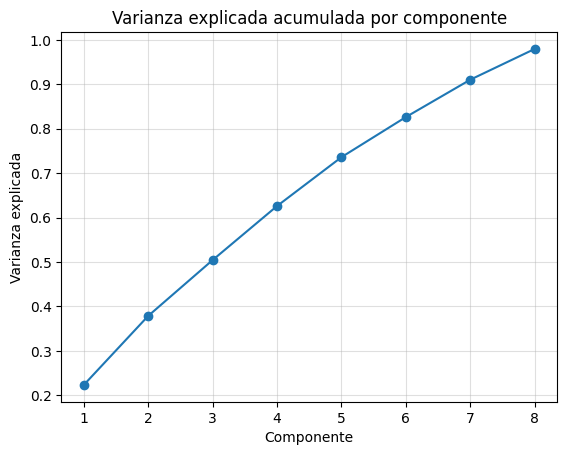

In [51]:
cumulative_var_exp = 0
n_components = 1
while cumulative_var_exp < 0.95:
    n_components += 1
    pca = PCA(n_components=n_components)
    pca.fit(CBP)
    cumulative_var_exp = sum(pca.explained_variance_ratio_)


print('Cantidad de componentes:', n_components)
print('Varianza explicada total: %',round(cumulative_var_exp*100,2))

var_exp = pca.explained_variance_ratio_
cumulative_var_exp = np.cumsum(pca.explained_variance_ratio_)

# graficar la varianza explicada y acumulada
plt.plot(range(1, len(cumulative_var_exp)+1), cumulative_var_exp, marker='o')
plt.xlabel('Componente')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada acumulada por componente')
plt.grid(visible= True , axis='both',alpha=0.4)

Con 8 componentes conseguimos un 97% de la varianza explicada, ahora convirtamos nuestros datos en un dataset.

In [52]:
CBP_PCA = pca.fit_transform(CBP)
CBP_PCA = pd.DataFrame(CBP_PCA)
CBP_PCA['Bankrupt?'] = CBP['Bankrupt?']
CBP_PCA

,0,1,2,3,4,5,6,7,Bankrupt?
0,2.165330e+09,-3.814949e+07,-3.237615e+09,-2.063212e+09,-1.969494e+09,-1.410239e+09,-8.723455e+08,-3.342048e+09,1
1,4.902366e+08,8.463795e+09,8.746100e+08,-3.292132e+09,-1.383796e+09,-1.194097e+09,-2.313543e+08,-2.330575e+09,1
2,-2.620138e+09,-2.169966e+09,-1.239416e+09,8.771527e+08,-2.812465e+09,-1.582306e+09,1.654892e+09,-4.584627e+08,1
3,3.249284e+09,5.987899e+09,-2.180465e+09,-4.385660e+09,-2.566962e+09,1.061380e+09,7.876119e+09,4.758288e+09,1
4,7.604602e+09,-2.951427e+09,2.267775e+09,-2.370486e+09,-1.647314e+09,-3.956955e+08,-4.681061e+08,2.215795e+09,1
...,...,...,...,...,...,...,...,...,...
6814,-2.835783e+09,-2.233507e+09,-1.652095e+09,1.622071e+09,-1.970057e+09,2.041660e+09,-2.013470e+09,-3.299241e+08,0
6815,-1.597369e+09,5.539448e+09,6.691095e+09,6.700097e+08,4.564149e+09,-1.530164e+09,-9.365200e+07,2.090440e+09,0
6816,-2.629663e+09,-2.704824e+09,-1.451370e+09,-3.203723e+08,-2.070655e+09,-1.982055e+09,-9.653597e+08,-5.235698e+08,0
6817,-3.931456e+09,1.162356e+09,5.165902e+08,-2.674333e+08,-2.380990e+09,5.204110e+08,-1.760442e+09,5.591211e+08,0


In [53]:
x = CBP_PCA.iloc[:,0:8]
y = CBP_PCA.iloc[:,8]

Recordemos que nuestro modelo esta altamente desbalanceado, arreglemos eso.

In [54]:
from imblearn.over_sampling import SMOTE
os = SMOTE()
x_os , y_os = os.fit_resample(x,y)


Ahora si podemos entrenar nuestro algoritmo, y para enonctar los parametros optimos utilizemos un algoritmo de grid search

In [55]:
X_train, X_test , y_train , y_test = train_test_split(x_os , y_os ,test_size = 0.2)

In [56]:
from sklearn.model_selection import GridSearchCV
# Hiperparametros
params = {
    'penalty':['l1', 'l2', 'elasticnet'],
    'C': [0.5,1.0,1.5,2.0],
    'intercept_scaling': [0.5,1.0,1.5],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky','sag', 'saga'],
    'max_iter': [1000]
}

LR = LogisticRegression()

grid_logistic_regression = GridSearchCV(estimator = LR,
                                        param_grid = params,
                                        scoring = 'neg_mean_absolute_error',
                                        cv = 5,
                                        verbose = 1,
                                        n_jobs = -1,
)

In [57]:
%%time
grid_logistic_regression.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    rai

CPU times: total: 1min 24s
Wall time: 12min 7s


C:\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.5, 1.0, 1.5, 2.0],
                         'intercept_scaling': [0.5, 1.0, 1.5],
                         'max_iter': [1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='neg_mean_absolute_error', verbose=1)

In [58]:
grid_logistic_regression.best_params_

{'C': 1.0,
 'intercept_scaling': 0.5,
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'liblinear'}

C:\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Python311\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


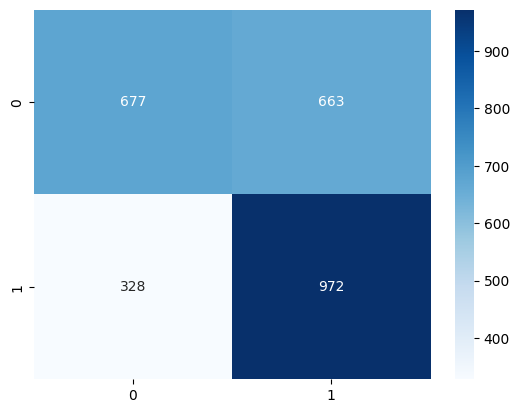

In [59]:
LR_best_params =  LogisticRegression(C= 0.5,
 intercept_scaling= 0.5,
 max_iter= 1000,
 penalty= 'l2',
 solver= 'newton-cg')
LR_best_params .fit(X_train,y_train)

# Prediccion 2
y_pred_2 = LR_best_params.predict(X_test)

# Matriz de confucion
cm_2 = confusion_matrix(y_test, y_pred_2)
sns.heatmap(data = cm_2, annot = True,cmap='Blues', fmt='g')
plt.show()

In [60]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.67      0.51      0.58      1340
           1       0.59      0.75      0.66      1300

    accuracy                           0.62      2640
   macro avg       0.63      0.63      0.62      2640
weighted avg       0.63      0.62      0.62      2640



# Conclusiones
Los resultados de la anterior entrega nos dieron una presision del 87%, un recall del 86% y un f1-score del 86% , mientras que como podemos observar en el reporte que acabamos de hacer, los resultados son mucho mas bajos, por lo tanto podemos afirmar que tomar las variables con mayor correlacion es mucho mas eficiente a la hora de entrenar un algoritmo de ML que utilizar todas las variables y comprimirlas con PCA.